# Cleaning and formating

Our csv comes pretty clean from our previous work during datamining (where we took the opportunity to standardize the column names). We will only have to deal with some null values and some formatting work.

### Setting up

We start by organizing the csv upload in dataframe in order to be able to work. We also look at the info to see the data type of the elements.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("marvel_comics.csv")

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       100 non-null    int64  
 1   title            100 non-null    object 
 2   series           100 non-null    object 
 3   on_sale_date     100 non-null    object 
 4   creators         100 non-null    object 
 5   creators_editor  100 non-null    object 
 6   creators_writer  100 non-null    object 
 7   description      90 non-null     object 
 8   characters       31 non-null     object 
 9   format           100 non-null    object 
 10  n_of_pages       100 non-null    int64  
 11  price            100 non-null    float64
dtypes: float64(1), int64(2), object(9)
memory usage: 9.5+ KB


In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")

### Dealing with nulls and columns standardization

Here we have little work to do. We discard the possible indexes that have all null values, get rid of the old dataframe index that we exported as csv and fill in the null values according to the value in their columns. 

In [6]:
df.dropna(how="all", inplace=True)

In [7]:
df.columns

Index(['unnamed:_0', 'title', 'series', 'on_sale_date', 'creators',
       'creators_editor', 'creators_writer', 'description', 'characters',
       'format', 'n_of_pages', 'price'],
      dtype='object')

In [8]:
df.drop(["unnamed:_0"], axis=1, inplace=True)

In [9]:
df.description.fillna("Not given", inplace=True)

In [10]:
df.characters.fillna("Not given", inplace=True)

### Dealing with on_sale_date

For the column of dates we have, we use the datetime method. So we can work with these values in a more efficient way, passing them **from object type to datetime64**.

In [11]:
df.on_sale_date = pd.to_datetime(df.on_sale_date, format= "%Y-%m-%d")

In [12]:
df.dtypes

title                      object
series                     object
on_sale_date       datetime64[ns]
creators                   object
creators_editor            object
creators_writer            object
description                object
characters                 object
format                     object
n_of_pages                  int64
price                     float64
dtype: object

### DataFrame Sneak Peak

We leave this section here to have a visualization of the df already standardized. It will help us to work in the following steps: grouping, filtering and visualization of the data.

In [84]:
df.sample(5)

,title,series,on_sale_date,creators,creators_editor,creators_writer,description,characters,format,n_of_pages,price
84,The Amazing Spider-Man (2022) #40 (Variant),The Amazing Spider-Man (2022 - Present),2023-12-20,"Vc Joe Caramagna, Sean “Cheeks” Galloway, Scot...",Emily Newcomen,['Zeb Wells'],"GANG WAR CONTINUES! Battle lines are drawn, wi...",Not given,Comic,32,4.99
59,Deadly Hands of Kung Fu: Gang War (2023) #1 (V...,Deadly Hands of Kung Fu: Gang War (2023 - Pres...,2023-12-27,"Vc Travis Lanham, Caio Majado, Greg Pak, Darre...",Darren Shan,['Greg Pak'],WHOSE SIDE ARE YOU ON? GANG WAR has thrown the...,Not given,Comic,32,4.99
25,Sensational She-Hulk (2023) #3,Sensational She-Hulk (2023 - 2024),2023-12-27,"Jen Bartel, Vc Joe Caramagna, Andres Genolet, ...",Nick Lowe,['Rainbow Rowell'],SHE-HULK & HULK face off against one of She-Hu...,"Hulk, She-Hulk (Jennifer Walters)",Comic,32,3.99
34,Ghost Rider (2022) #21,Ghost Rider (2022 - Present),2023-12-27,"Bjorn Barends, Vc Travis Lanham, Carlos Nieto,...",Darren Shan,['Benjamin Percy'],END OF THE ROAD! The Cult of Mephisto is posse...,"Doctor Strange, Ghost Rider (Johnny Blaze)",Comic,32,4.99
20,Sensational She-Hulk (2023) #3 (Variant),Sensational She-Hulk (2023 - 2024),2023-12-27,"Vc Joe Caramagna, DEE CUNNIFFE, Ariel Diaz, An...",Nick Lowe,['Rainbow Rowell'],SHE-HULK & HULK face off against one of She-Hu...,Not given,Comic,32,3.99


# Grouping and filtering

### Obtaining Most Published Character

Let's get **the most recurrent characters that appear in the publications** of our df. To do this we will create a function that iterates through all the rows looking for certain characters and updates a counter of their appearances.

Note: we have considered that in this count of appearances we do not only count main characters. We also include groups of characters such as "Avengers" and "X-men" and from another editorial universe, such as "Star Wars".

In [14]:
most_published_character = {"spider-man":0,
                          "loki":0,
                           "avengers":0,
                           "x-men":0,
                           "spider-woman":0,
                           "hulk":0,
                           "captain marvel":0,
                           "she-hulk":0,
                           "doctor strange":0,
                           "captain america":0,
                           "shang-chi":0,
                           "black panther":0,
                           "black widow":0,
                           "star wars":0,
                           "wolverine":0,
                           "ms. marvel":0,
                           "moon knight":0,
                            "venom":0,
                            "carnage":0
                          }

In [15]:
def character_finder(x):
    
    '''
    his is the function we were talking about before.

    Iterates over a previously given dictionary. For each key of that dictionary, it iterates again in the search of the word 
    match on each row of our df. When it finds a match, it adds 1 to the counter to the value of the key 
    (and exits the loop by a boolean condition thus avoiding that the counter does not add too much).
    
    '''
    
    
    for ele in x:
        
        for index, row in df.iterrows():
            
            str_found=False
            
            for count in row:
                if ele in str(count).lower():
                    str_found=True
                    break
            if str_found:
                most_published_character[ele]+=1
    return most_published_character

In [16]:
most_pub_char = character_finder(most_published_character.keys())

In [17]:
# From here and in subsequent lines of code. We convert the dictionary to df in order to sort it in descending order.

df_most_published_character = pd.DataFrame(list(most_pub_char.items()), columns=["character","appearances"])
df_most_published_character.set_index("character", inplace=True)

In [18]:
df_most_published_character = df_most_published_character["appearances"].sort_values(ascending=False)

In [19]:
df_most_published_character = df_most_published_character.reset_index()

In [20]:
# Here, we obtain the definitive df concerning the most recurrent character

df_most_published_character.set_index("character", inplace=True)

In [21]:
# We also have another df with the top 5

df_top5_mpc = df_most_published_character.head(5)

In [22]:
df_top5_mpc

,appearances
character,
spider-man,25
star wars,12
x-men,9
wolverine,9
avengers,7


### Obtaining Series in Course

Similar to what we did in the previous section, we will iterate over the series column **to count the publications belonging to active series or closed series**.

Note: closed series will also include one-shot publications.

In [23]:
series_counter = {"series in course": 0,"completed series":0}

In [24]:
# Iterate to find the word "present" (indicating that the series is still active).

for comic in df["series"]:
    if "present" in str(comic).lower():
        series_counter["series in course"]+=1
    else:
        series_counter["completed series"]+=1

In [25]:
# From here, we convert the dictionary to df to display it 

df_series_counter = pd.DataFrame(list(series_counter.items()), columns=["type","n_publications"])

In [26]:
df_series_counter.set_index("type", inplace=True)

In [27]:
df_series_counter = df_series_counter.reset_index()

In [28]:
df_series_counter.set_index("type", inplace=True)

In [29]:
df_series_counter

,n_publications
type,
series in course,79
completed series,21


### Obtaining Ranking On Sale Date 

Through a value counts we are going to get the number of publications per day of the sample we have. This will help us **to know which days were more important in launches**.

In [30]:
# We use the dt.date function to make the count go well.

df_on_sale_date = df["on_sale_date"].dt.date.value_counts()

In [31]:
df_on_sale_date =  df_on_sale_date.reset_index().rename(columns={"count":"n_publications"})

In [32]:
# We convert the dictionary to df for displaying it

df_on_sale_date.set_index("on_sale_date", inplace=True)

In [33]:
# We cut in another df the top 5 for more accuracy

df_ranking_osd = df_on_sale_date.head(5)

In [34]:
df_ranking_osd

,n_publications
on_sale_date,
2023-12-27,71
2023-12-20,21
2023-12-29,2
2023-12-22,2
2023-12-28,1


### Obtaining Ranking Editors

Similar to how we did with the on sale date ranking, we will use the value counts form **to know which publishers have appeared the most times**.

In [35]:
ranking_editors = df["creators_editor"].value_counts()

In [36]:
df_ranking_editors = pd.DataFrame(ranking_editors)

In [37]:
df_ranking_editors.rename(columns={"count":"works"}, inplace=True)
df_ranking_editors.index.name="editor"

In [38]:
df_ranking_editors = df_ranking_editors.reset_index().head(5)

In [39]:
# We convert the dictionary to df for displaying it

df_ranking_editors.set_index("editor", inplace=True)

In [40]:
# As we did it before, we cut a new top 5 in a new df

df_top5_re = df_ranking_editors.head(5)

In [41]:
df_top5_re

,works
editor,
Emily Newcomen,25
Mark Paniccia,13
Sarah Brunstad,11
Mark Basso,9
Tom Brevoort,8


### Obtaining Ranking Writers

The ranking of writers differs from the ranking of publishers. The difference is that in the editors ranking we had a column of single values and in writers, **each item contains a list of names**.

In [42]:
'''
Honestly, I don't know how eval() works at all but it has allowed us to add all the elements of the lists read 
in each iteration to the new list containing all the writers
'''

writers_bulk = []

for i in df.creators_writer:
    writer_list = eval(i)
    writers_bulk.extend(writer_list)

In [43]:
from collections import Counter

In [44]:
#We use Counter to obtain a dictionary from a writer's value count 

writers_counter = Counter(writers_bulk)

In [45]:
#And so on, with the data collected, we proceed to do a new df for a ranking writers

df_writers_counter = pd.DataFrame(list(writers_counter.items()), columns=["writer","works"])

In [46]:
df_writers_counter.set_index("writer", inplace=True)

In [47]:
df_writers_counter = df_writers_counter["works"].sort_values(ascending=False)

In [48]:
df_writers_counter = df_writers_counter.reset_index()

In [49]:
df_writers_counter.set_index("writer", inplace=True)

In [50]:
# Also, we do a cut of 5 for a top df

df_top5_rw = df_writers_counter.head(5)

In [51]:
df_top5_rw

,works
writer,
Benjamin Percy,13
Tom Defalco,9
Alyssa Wong,7
Steve Foxe,6
Charles Soule,6


### Obtaining Most Published Format

From the data we have on the format of each of the publications, we obtain the **number of publications by format of publication**.

In [52]:
df_format = df["format"].value_counts()

In [53]:
df_format = pd.DataFrame(df_format)

In [54]:
df_format.rename(columns={"count":"n_publications"}, inplace=True)

In [55]:
df_format

,n_publications
format,
Comic,83
Digital Vertical Comic,10
Trade Paperback,4
Hardcover,3


### Obtaining Format-Pages statistics

The number of pages per publication is **one of the few numerical columns we have**. That is why **grouping it with the publication format** we will find interesting statistics thanks to some aggregations.

In [56]:
#We group and operate to obtain results that we will interpret later. 

df_pages_format = df.groupby("format")["n_of_pages"].agg(["count","sum","mean","max","min"]).rename(columns={"count":"n_publications",
                                                                                                             "sum":"total_pages",
                                                                                                             "mean":"average_n_pages",
                                                                                                             "max":"format_max_pages",
                                                                                                             "min":"format_min_pages"
                                                                                                            })

In [57]:
df_pages_format = df_pages_format.round(2)

In [58]:
df_pages_format = df_pages_format.sort_values(by="n_publications", ascending=False)

In [59]:
# our new df allows us to see the performance of the formats in relation to their number of pages 

df_pages_format

,n_publications,total_pages,average_n_pages,format_max_pages,format_min_pages
format,,,,,
Comic,83,2728,32.87,56,32
Digital Vertical Comic,10,48,4.80,6,3
Trade Paperback,4,1496,374.00,488,120
Hardcover,3,2744,914.67,1304,304


In [60]:
df_pages_format_desc = df_pages_format.describe().round(2).rename(index={"mean":"average",
                                                                         "min":"minimal_value",
                                                                         "max":"maximun_value",
                                                                         "std":"std_deviation"
                                                                        })

In [61]:
df_pages_format_desc = df_pages_format_desc.drop(["count","25%","50%","75%"], axis=0)

In [62]:
# we describe the previous df in order to have a more global vision

df_pages_format_desc

,n_publications,total_pages,average_n_pages,format_max_pages,format_min_pages
average,25.00,1754.00,331.58,463.50,114.75
std_deviation,38.79,1278.77,423.40,600.67,135.62
minimal_value,3.00,48.00,4.80,6.00,3.00
maximun_value,83.00,2744.00,914.67,1304.00,304.00


### Obtaining Format-Prices statistics

This grouping and aggregation is **identical to the one we did in the Format-Pages relationship**. The statistics we obtain will give us an insight into the performance of each format for its price.

In [63]:
df_prices_format = df.groupby("format")["price"].agg(["count","sum","mean","max","min"]).rename(columns={"count":"n_publications",
                                                                                                         "sum":"total_prices",
                                                                                                         "mean":"average_price",
                                                                                                         "max":"format_max_price",
                                                                                                         "min":"format_min_price"
                                                                                                        })

In [64]:
df_prices_format = df_prices_format.round(2)

In [65]:
df_prices_format = df_prices_format.sort_values(by="n_publications", ascending=False)

In [66]:
# As we did in the previous section, this df allows us to see the format performance with respect to price.

df_prices_format

,n_publications,total_prices,average_price,format_max_price,format_min_price
format,,,,,
Comic,83,381.17,4.59,6.99,3.99
Digital Vertical Comic,10,0.00,0.00,0.00,0.00
Trade Paperback,4,152.96,38.24,44.99,17.99
Hardcover,3,350.00,116.67,150.00,75.00


In [67]:
df_prices_format_desc = df_prices_format.describe().round(2).rename(index={"mean":"average",
                                                                           "min":"minimal_value",
                                                                           "max":"maximun_value",
                                                                           "std":"std_deviation"})

In [68]:
df_prices_format_desc = df_prices_format_desc.drop(["count","25%","50%","75%"], axis=0)

In [69]:
# another new df to view the above statistics more globally

df_prices_format_desc

,n_publications,total_prices,average_price,format_max_price,format_min_price
average,25.00,221.03,39.88,50.50,24.24
std_deviation,38.79,178.67,53.96,69.22,34.70
minimal_value,3.00,0.00,0.00,0.00,0.00
maximun_value,83.00,381.17,116.67,150.00,75.00


### Obtaining Max Page and Min Page Publication

Thanks to the data obtained in the previous groupings, we know **the exact value of the maximum and minimum number of pages** to filter and find the **exact comic they refer to**.

In [70]:
max_page_publication = df.groupby("n_of_pages").get_group(1304)
max_page_publication

,title,series,on_sale_date,creators,creators_editor,creators_writer,description,characters,format,n_of_pages,price
46,SPIDER-MAN: BEN REILLY OMNIBUS VOL. 1 HC BUTLE...,SPIDER-MAN: BEN REILLY OMNIBUS VOL. 1 HC BUTLE...,2023-12-27,"Greg Adams, Jeff Albrecht, Bill Anderson, Bret...",Not given,"['Karl Bollers', 'Tom Defalco', 'Todd Dezago',...",Collects Web of Scarlet Spider (1995) #1-4; Am...,Not given,Hardcover,1304,150.0


In [71]:
min_page_publication = df.groupby("n_of_pages").get_group(3)
min_page_publication

,title,series,on_sale_date,creators,creators_editor,creators_writer,description,characters,format,n_of_pages,price
0,Marvel Mutts Infinity Comic (2023) #5,Marvel Mutts Infinity Comic (2023 - Present),2023-12-29,"Raul Angulo, Mackenzie Cadenhead, Takeshi Miya...",Mark Paniccia,['Mackenzie Cadenhead'],Not given,"Lockjaw, Ms. America (America Chavez), Ms. Mar...",Digital Vertical Comic,3,0.0
1,Alligator Loki Infinity Comic (2022) #29,Alligator Loki Infinity Comic (2022 - 2023),2023-12-29,"Michelle Marchese, Pete Pantazis, Robert Quinn...",Michelle Marchese,['Alyssa Wong'],Not given,"Doctor Strange, Loki",Digital Vertical Comic,3,0.0
76,Alligator Loki Infinity Comic (2022) #28,Alligator Loki Infinity Comic (2022 - 2023),2023-12-22,"Michelle Marchese, Pete Pantazis, Robert Quinn...",Michelle Marchese,['Alyssa Wong'],Not given,Loki,Digital Vertical Comic,3,0.0
77,Marvel Mutts Infinity Comic (2023) #4,Marvel Mutts Infinity Comic (2023 - Present),2023-12-22,"Raul Angulo, Mackenzie Cadenhead, Takeshi Miya...",Mark Paniccia,['Mackenzie Cadenhead'],Not given,Lockjaw,Digital Vertical Comic,3,0.0


### Obtaining Max Price and Min Price Publication

Thanks to the data obtained in the previous groupings, we know the exact value of **the maximum and minimum price per comic** to filter and find **the exact publication they refer to**.

In [72]:
max_price_publication = df.groupby("price").get_group(150)
max_price_publication

,title,series,on_sale_date,creators,creators_editor,creators_writer,description,characters,format,n_of_pages,price
46,SPIDER-MAN: BEN REILLY OMNIBUS VOL. 1 HC BUTLE...,SPIDER-MAN: BEN REILLY OMNIBUS VOL. 1 HC BUTLE...,2023-12-27,"Greg Adams, Jeff Albrecht, Bill Anderson, Bret...",Not given,"['Karl Bollers', 'Tom Defalco', 'Todd Dezago',...",Collects Web of Scarlet Spider (1995) #1-4; Am...,Not given,Hardcover,1304,150.0


In [73]:
min_price_publication = df.groupby("price").get_group(3.99)
min_price_publication

,title,series,on_sale_date,creators,creators_editor,creators_writer,description,characters,format,n_of_pages,price
4,Marvel Super Heroes Secret Wars: Battleworld (...,Marvel Super Heroes Secret Wars: Battleworld (...,2023-12-27,"Mark Basso, Vc Joe Caramagna, John Tyler Chris...",Mark Basso,['Tom Defalco'],"BRING ON THE BAD GUYS! SPIDER-MAN, freshly att...",Not given,Comic,32,3.99
5,Captain Marvel (2023) #3 (Variant),Captain Marvel (2023 - Present),2023-12-27,"Jan Bazaldua, Ruairi Coleman, Vc Ariana Maher,...",Emily Newcomen,['Alyssa Wong'],STEALING FROM THE STRANGES! Captain Marvel's t...,Not given,Comic,32,3.99
12,Black Panther (2023) #7 (Variant),Black Panther (2023 - Present),2023-12-27,"Eve Ewing, PEACH MOMOKO, Emily Newcomen, Vc Jo...",Emily Newcomen,['Eve Ewing'],A FACTION WAR BREWING IN BIRNIN T'CHAKA? Blac...,Not given,Comic,32,3.99
13,Miles Morales: Spider-Man (2022) #14 (Variant),Miles Morales: Spider-Man (2022 - 2023),2023-12-27,"Thomas Groneman, In-Hyuk Lee, Vc Cory Petit, B...",Thomas Groneman,['Cody Ziglar'],THE PROWLER ENTERS THE BATTLEFIELD! HOBGOBLIN ...,Not given,Comic,32,3.99
14,Marvel Super Heroes Secret Wars: Battleworld (...,Marvel Super Heroes Secret Wars: Battleworld (...,2023-12-27,"Vc Joe Caramagna, Tom Defalco, Sean “Cheeks” G...",Emily Newcomen,['Tom Defalco'],"BRING ON THE BAD GUYS! SPIDER-MAN, freshly att...",Not given,Comic,32,3.99
20,Sensational She-Hulk (2023) #3 (Variant),Sensational She-Hulk (2023 - 2024),2023-12-27,"Vc Joe Caramagna, DEE CUNNIFFE, Ariel Diaz, An...",Nick Lowe,['Rainbow Rowell'],SHE-HULK & HULK face off against one of She-Hu...,Not given,Comic,32,3.99
22,Miles Morales: Spider-Man (2022) #14,Miles Morales: Spider-Man (2022 - 2023),2023-12-27,"Thomas Groneman, Vc Cory Petit, Alejandro Sanc...",Thomas Groneman,['Cody Ziglar'],THE PROWLER ENTERS THE BATTLEFIELD! HOBGOBLIN ...,"Prowler, Spider-Man (Miles Morales)",Comic,32,3.99
25,Sensational She-Hulk (2023) #3,Sensational She-Hulk (2023 - 2024),2023-12-27,"Jen Bartel, Vc Joe Caramagna, Andres Genolet, ...",Nick Lowe,['Rainbow Rowell'],SHE-HULK & HULK face off against one of She-Hu...,"Hulk, She-Hulk (Jennifer Walters)",Comic,32,3.99
26,Marvel Super Heroes Secret Wars: Battleworld (...,Marvel Super Heroes Secret Wars: Battleworld (...,2023-12-27,"Mark Basso, Vc Joe Caramagna, Tom Defalco, MAT...",Mark Basso,['Tom Defalco'],"BRING ON THE BAD GUYS! SPIDER-MAN, freshly att...",Not given,Comic,32,3.99
29,X-Force (2019) #47 (Variant),X-Force (2019 - Present),2023-12-27,"Mark Basso, Vc Joe Caramagna, Guru Efx, Benjam...",Mark Basso,['Benjamin Percy'],X-FORCE: RELOADED! A SPECIAL ISSUE! X-FORCE RE...,Not given,Comic,32,3.99


In [74]:
len(min_price_publication)

42

# Statistical Graphics

For this final part, we apply thanks to **seaborn and matplotlib graphic libraries** that allow us to better **understand the statistics** obtained in a more visual way.

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Most Published Character

*Performance Notes*:

*This top 5 reflects the characters (or themes) that appear most in the publications of the sample. From the top 5 onwards the appearances are much less numerous, reflecting the great variety of main characters in other comics*

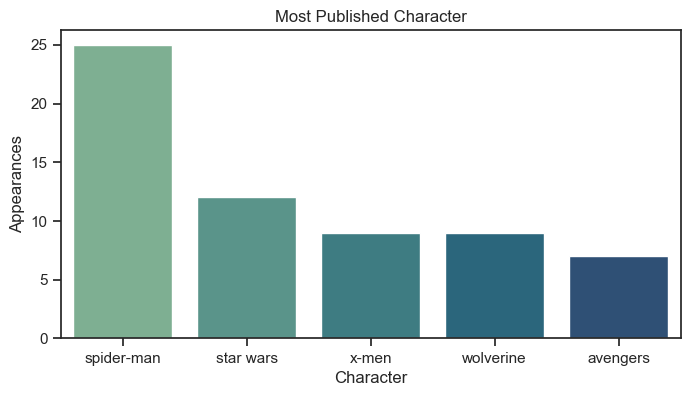

In [76]:
sns.set(style="ticks")
plt.figure(figsize=(8, 4))
sns.barplot(x=df_top5_mpc.index, y='appearances', data=df_top5_mpc, palette="crest")
plt.title('Most Published Character')
plt.xlabel('Character')
plt.ylabel('Appearances')
plt.xticks(rotation=0)
plt.show()

### Series in Course

*Performance Notes*:

*This pie-chart helps us visualize the trend for the continuous publication of open series compared to the publication of closed series and one-shots*.Ç

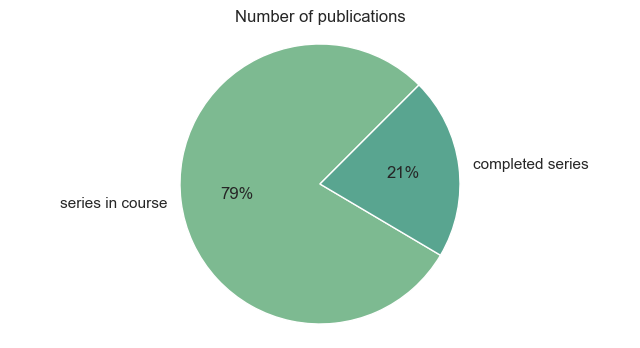

In [77]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
plt.pie(df_series_counter['n_publications'], labels=df_series_counter.index, autopct='%1.0f%%', startangle=45, colors=sns.color_palette("crest"))
plt.title('Number of publications')
plt.axis('equal') 
plt.show()

### Ranking On Sale Date

*Performance Notes:*

*The Last 100 Comics of 2023 are published between December 29 and 20. As we can see, the 27th followed by the 23rd stand out as the busiest days*.

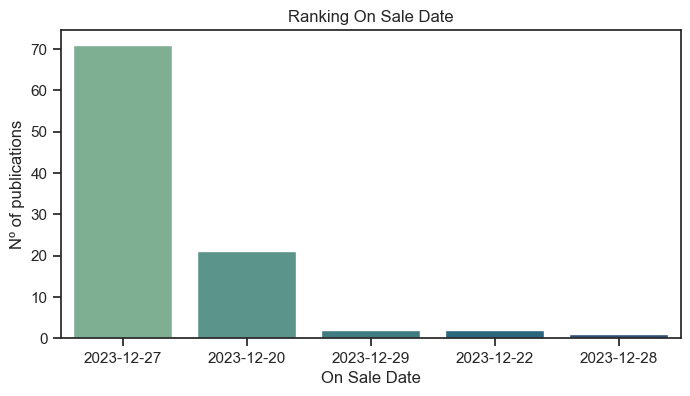

In [78]:
sns.set(style="ticks")
plt.figure(figsize=(8, 4))
sns.barplot(x=df_ranking_osd.index, y='n_publications', data=df_ranking_osd, palette="crest")
plt.title('Ranking On Sale Date')
plt.xlabel('On Sale Date')
plt.ylabel('Nº of publications')
plt.xticks(rotation=0)
plt.show()

### Ranking Editors

*Performance Notes*:

*The first editor in the ranking stands out in activity above the second in the graph. After the top 5, the appearances are reduced to almost an editor relationship per single publication*.

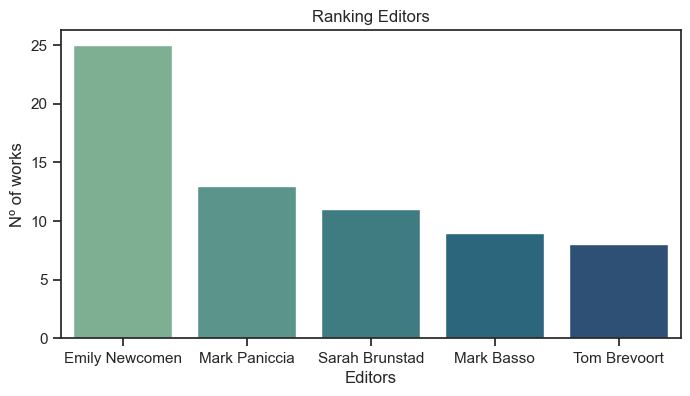

In [79]:
sns.set(style="ticks")
plt.figure(figsize=(8, 4))
sns.barplot(x=df_top5_re.index, y='works', data=df_top5_re, palette="crest")
plt.title('Ranking Editors')
plt.xlabel('Editors')
plt.ylabel('Nº of works')
plt.xticks(rotation=0)
plt.show()

### Ranking Writers

*Performance Notes*:

*In this graph, the most prolific writer is not so far from those next at the top. It stands out that the works per writer are more numerous throughout the sample, in contrast to the activity of the editors*.

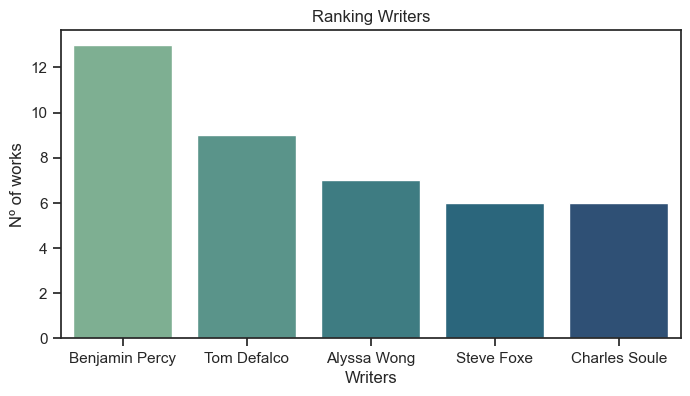

In [80]:
sns.set(style="ticks")
plt.figure(figsize=(8, 4))
sns.barplot(x=df_top5_rw.index, y='works', data=df_top5_rw, palette="crest")
plt.title('Ranking Writers')
plt.xlabel('Writers')
plt.ylabel('Nº of works')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

### Most Published Format

*Performance Notes*:

*It is clearly seen how the comic format predominates compared to the other three types. It must also be understood that both "Trade Paperback" and "Hardcover" are special formats that are not so recurring. And "Digital Vertical Comic" is a subscription publishing venture that is starting to work now*.

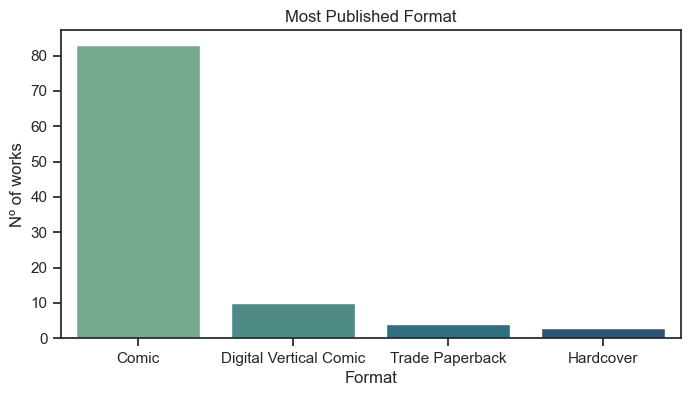

In [81]:
sns.set(style="ticks")
plt.figure(figsize=(8, 4))
sns.barplot(x=df_format.index, y='n_publications', data=df_format, palette="crest")
plt.title('Most Published Format')
plt.xlabel('Format')
plt.ylabel('Nº of works')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

### Format-Pages Statistics

*Performance Notes*:

*The chart reflects 5 measurable values (number of publications, totality of pages, average number of pages, maximun pages and minimum pages per comic) in relation to publications formats and their respective pages*.

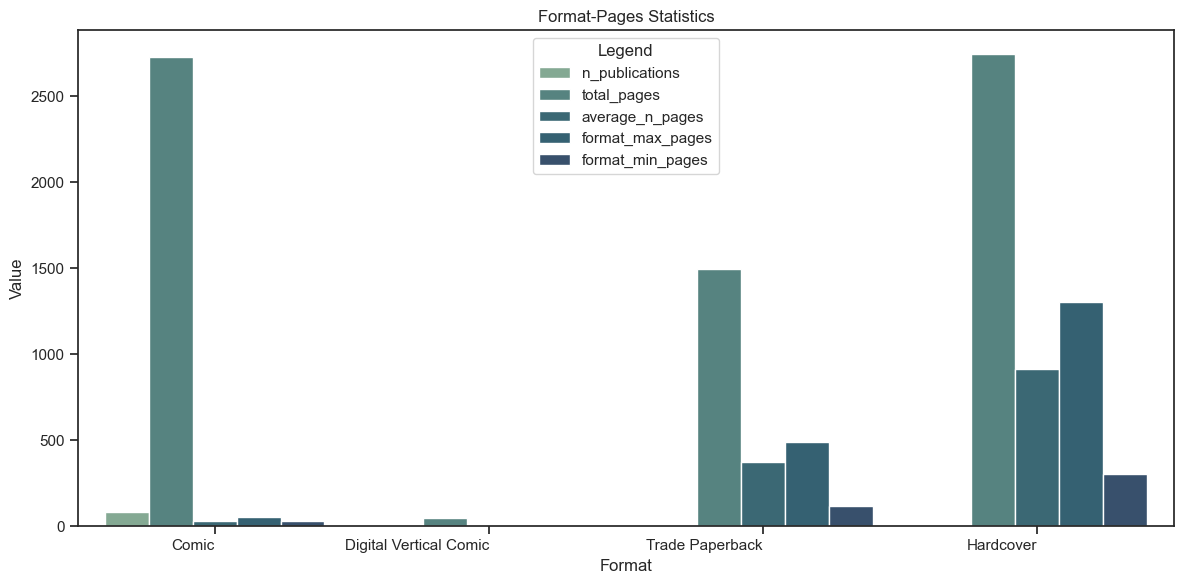

In [82]:
df_fp_stats = df_pages_format.reset_index()

df_plot = df_fp_stats.melt(id_vars='format', var_name='metric', value_name='value')

sns.set(style="ticks")
plt.figure(figsize=(12, 6))

sns.barplot(x='format', y='value', hue='metric', data=df_plot, palette=["#7EAF92", "#4E8A86", "#316E7E", "#2B667C", "#2F5075"])
plt.title('Format-Pages Statistics')
plt.xlabel('Format')
plt.ylabel('Value')

plt.xticks(rotation=0, ha='right')

plt.legend(title='Legend')

plt.tight_layout()
plt.show()

### Format-Prices Statistics

*Performance Notes*:

*The chart reflects 5 measurable values (number of publications, totality of prices, average prices, maximun price and minimum price per comic) in relation to publications formats and their respective prices*.

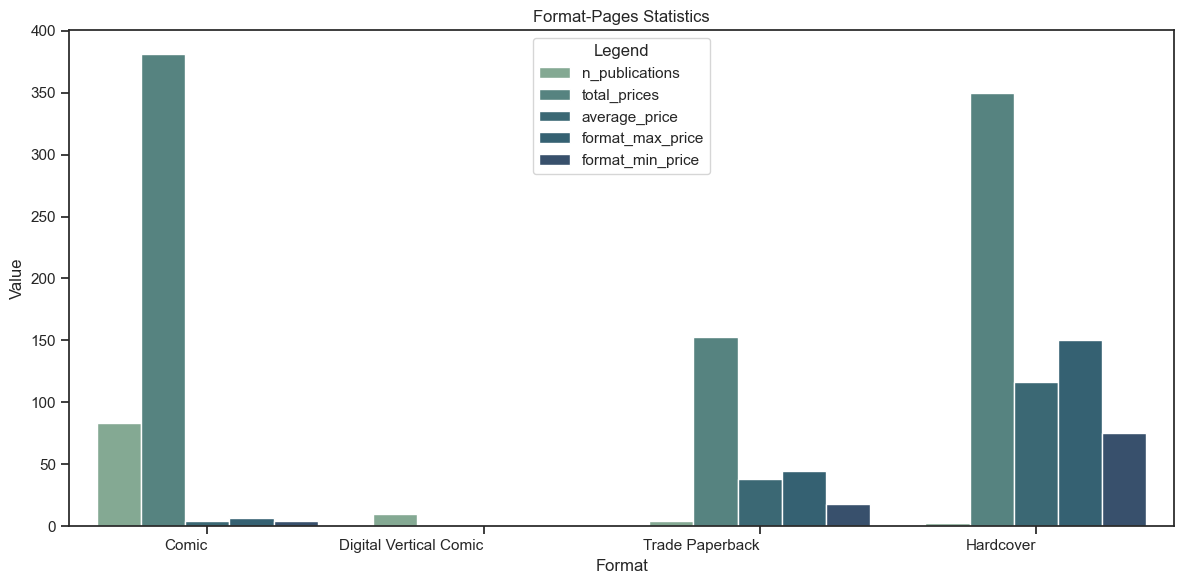

In [83]:
df_fpr_stats = df_prices_format.reset_index()

df_plot = df_fpr_stats.melt(id_vars='format', var_name='metric', value_name='value')

sns.set(style="ticks")
plt.figure(figsize=(12, 6))

sns.barplot(x='format', y='value', hue='metric', data=df_plot, palette=["#7EAF92", "#4E8A86", "#316E7E", "#2B667C", "#2F5075"])
plt.title('Format-Pages Statistics')
plt.xlabel('Format')
plt.ylabel('Value')

plt.xticks(rotation=0, ha='right')

plt.legend(title='Legend')

plt.tight_layout()
plt.show()